### Jupyter часть

- [+] Подготовка данных
  - Скачать известный датасет **Титаник** (train и test)
  - Загрузить их как `pandas.DataFrame`
  - Корректно конкатенировать их в один DataFrame по ключу `PassengerID`.
  Отсутствующие данные должны быть `Nan`. Все столбцы должны быть корректных типов, в частности, выживание, класс и пол должны быть категориальными
- [+] Анализ таблицы
  - Визуализировать базовую статистику таблицы. В каком классе было больше всего пассажиров?
  - Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?
  - Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?
  - Какое максимальное количество родных было с выжившим пассажиром?
- [+] Визуализация
  - Необходимо построить по данным таблицы 10 *различных* графиков на своё усмотрение и фантазию.
  Использовать можно любые средства, однако рекомендуется Seaborn и Plotly.
  - 5 графиков должно быть интерактивными
  - 1 график необходимо сделать 3D
  - Среди представленных графиков должны быть
    - [+] Scatter plot
    - [+] Linear plot (with several lines)
    - [+] Histogram
    - [+] Bar chart
    - [+] Horizontal bar chart
    - [+] Pie chart
    - [+] Box chart
    - [+] Sunburst chart

# Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('gender_submission.csv')

In [ ]:
test_full = test_df.merge(test_labels_df, on='PassengerId', how='left')  # we combine them to assign the Survived values to test.csv
titanic_df = pd.concat([train_df, test_full], ignore_index=True) # ignore_index - completely ignoring old indexes and creating new ones

# Анализ таблицы

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### В каком классе было больше всего пассажиров?

In [ ]:
titanic_df['Pclass'].value_counts()

,count
Pclass,
3,709
1,323
2,277


### Ответ:
- в 3 классе было больше всего пассажиров

### Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

In [ ]:
titanic_df.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

#### Ответ:
- самый юный женщины 3-го класса
- самый взрослый мужчины 1-го класса
- Эти значения отличаются на 18.84

### Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?

In [ ]:
survived_k = titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Name'].str.startswith('K', na=False))]
survived_k.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1215,1216,1,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
935,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1,0,11753,52.5542,D19,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
1056,1057,1,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.0250,NaN,S
1137,1138,1,2,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S
1140,1141,1,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


#### Ответ:
- заплатила больше всех Kreuchen, Miss. Emilie,
- Kelly, Miss. Anna Katherine "Annie Kate" и Kelly, Miss. Mary заплатили меньше всех

### Какое максимальное количество родных было с выжившим пассажиром?

In [ ]:
titanic_df['Total_relatives'] = titanic_df['SibSp'] + titanic_df['Parch']
survived_k = titanic_df[(titanic_df['Survived'] == 1)]
survived_k.sort_values('Total_relatives', ascending=False)[:5]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_relatives
1256,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S,10
1079,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
1031,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S,7
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,6
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,6


#### Ответ:
- максимально количество родных было у Sage, Mrs. John (Annie Bullen) и Sage, Miss. Ada - 10

# Визуализация

##### Интерактивный Scatter Plot

In [ ]:
fig1 = px.scatter(titanic_df, x='Age', y='Fare',
                 color='Survived',
                 hover_data=['Name'],
                 title='Scatter Plot: Возраст vs Стоимость билета'
                )
fig1.show()

##### Интерактивный Bar Chart

In [ ]:
survival_data = titanic_df.groupby(['Pclass', 'Sex'], observed=True)['Survived'].sum().reset_index() # reset_index - перенумеровывает от 1 до 6 и преобразует в Dataframe

fig2 = px.bar(survival_data, x='Pclass', y='Survived', color='Sex',
             title='Bar Chart: Выжившие по классам и полу',
             barmode='group', # to be separate
            )

fig2.show()

##### Интерактивный Pie Chart

In [ ]:
fig3 = px.pie(titanic_df, names='Embarked',
             title='Pie Chart: Порты посадки',
             hover_data=['Fare']
             )
fig3.show()

##### Интерактивный Box Chart

In [ ]:
fig4 = px.box(titanic_df, x='Pclass', y='Age', color='Sex',
             title='Box Plot: Распределение возраста по классам и полу'
             )
fig4.show()

##### Интерактивная Histogramm

In [ ]:
fig5 = px.histogram(titanic_df, x='Age', color='Survived', nbins=10,
                   title='Histogram: Распределение возраста по выживаемости',
                   barmode='stack', opacity=0.7
                   )
fig5.show()

##### 3D Scatter Plot

In [ ]:
fig6 = px.scatter_3d(titanic_df, x='Age', y='Fare', z='Pclass',
                    color='Survived', size='SibSp',
                    hover_data=['Sex', 'Embarked'],
                    title='3D Scatter Plot: Возраст, Стоимость билета и Класс'
                    )
fig6.show()

##### Linear Plot

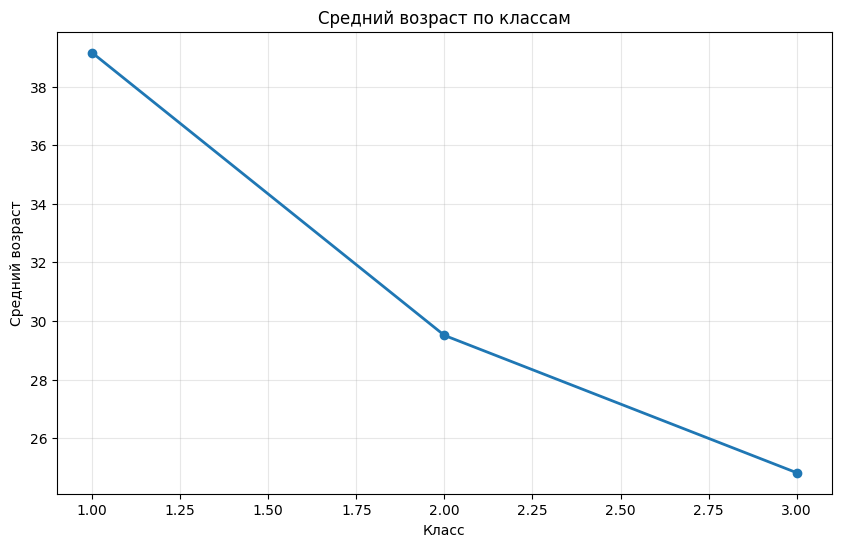

In [ ]:
age_by_class = titanic_df.groupby('Pclass')['Age'].mean()

plt.figure(figsize=(10, 6))
plt.plot(age_by_class.index, age_by_class.values, marker='o', linewidth=2)
plt.title('Средний возраст по классам')
plt.xlabel('Класс')
plt.ylabel('Средний возраст')
plt.grid(True, alpha=0.3)
plt.show()

##### Horizontal Bar Chart

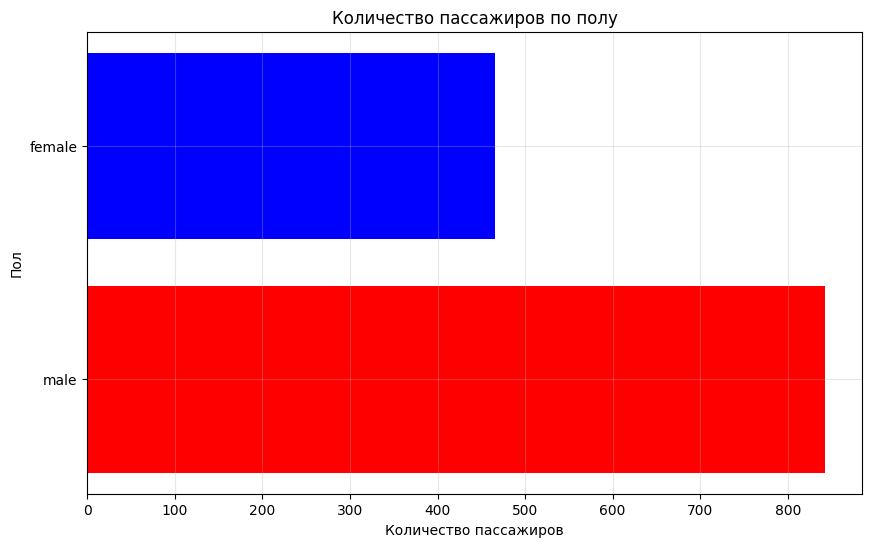

In [ ]:
sex_counts = titanic_df['Sex'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(sex_counts.index, sex_counts.values, color = ['red', 'blue'])
plt.title('Количество пассажиров по полу')
plt.xlabel('Количество пассажиров')
plt.ylabel('Пол')
plt.grid(True, alpha=0.3)
plt.show()


##### Sunburst Chart

In [ ]:
fig = px.sunburst(titanic_df,
                  path=['Pclass', 'Sex', 'Survived'],  # Levels: Class -> Sex -> Survived
                  title='Sunburst Chart: Пассажиры Титаника')

fig.show()


##### Horizontal Bar Chart (10 график)

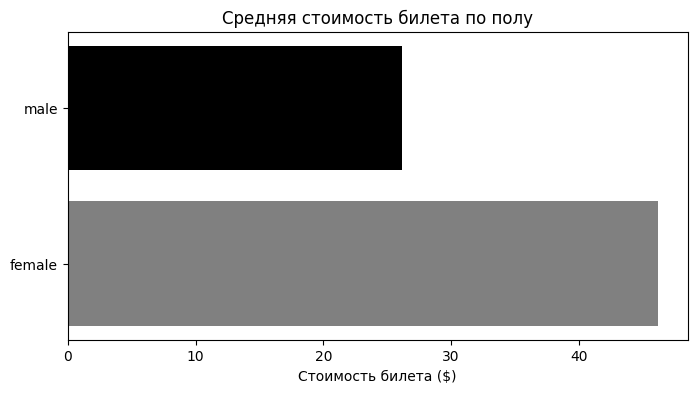

In [ ]:
fare_by_sex = titanic_df.groupby('Sex')['Fare'].mean()

plt.figure(figsize=(8, 4))
plt.barh(fare_by_sex.index, fare_by_sex.values, color=['grey', 'black'])
plt.title('Средняя стоимость билета по полу')
plt.xlabel('Стоимость билета ($)')
plt.show()